# geopandas_choropleth 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import japanize_matplotlib
import mojimoji

/home/toshiaki/.pyenv/versions/3.7.2/envs/douEnv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/toshiaki/.pyenv/versions/3.7.2/envs/douEnv/lib/python3.7/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
geo_df = gpd.read_file("./hokkaido.geojson", encoding="SHIFT-JIS")

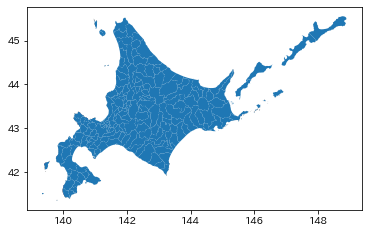

In [3]:
geo_df.plot()

(138.855938019, 149.372425341, 41.1413656675, 45.76752330249999)

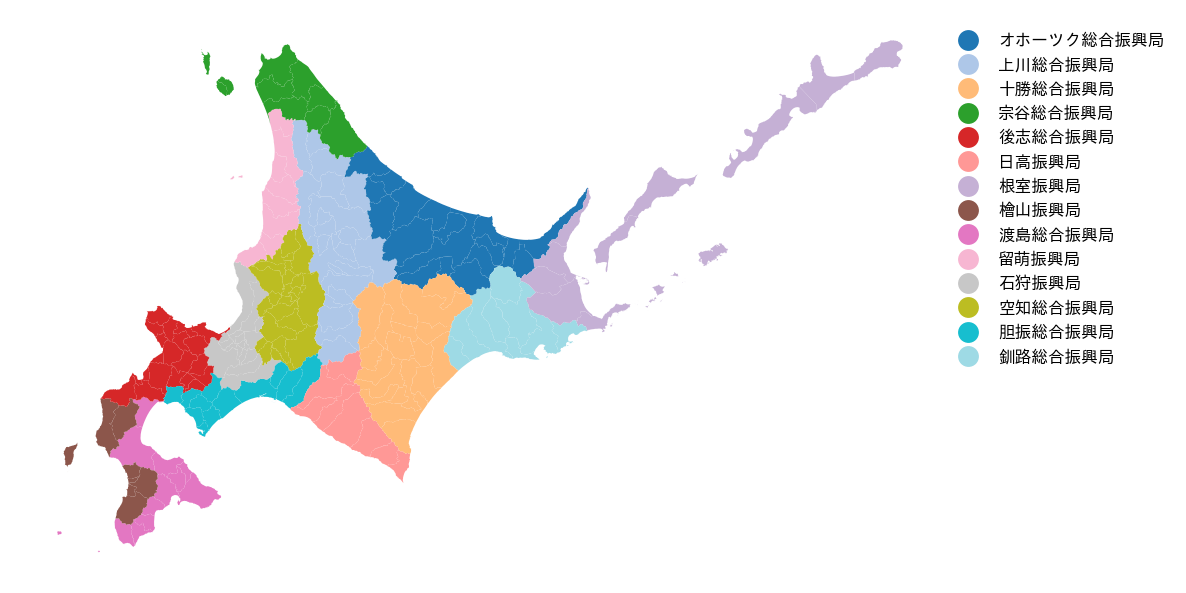

In [4]:
fig = plt.figure(figsize=(8,6),dpi=150)
ax = fig.add_subplot(111)
legend_kwds = dict(bbox_to_anchor=(1, 0.98), loc='upper left', borderaxespad=0, fontsize=8,frameon = False)
ax = geo_df.plot(column="N03_002",legend=True, legend_kwds=legend_kwds,ax=ax, cmap="tab20")
plt.axis('off')

# Total population. 

In [5]:
location = "N03_002"

df = pd.read_excel("./hokkaido_population.xls", sheet_name="municipality")
df["municipality"] = df["municipality"].apply(mojimoji.han_to_zen).str.rstrip("計")

rep_dic = { }
for c1 in geo_df[location].unique():
    for c2 in df["municipality"].unique():
        if c1[:2] == c2[:2]:
            rep_dic[c2] = c1
            
df[location ] = df["municipality"].replace(rep_dic)
geo_merged = pd.merge(geo_df, df, on=location)

(138.855938019, 149.372425341, 41.1413656675, 45.76752330249999)

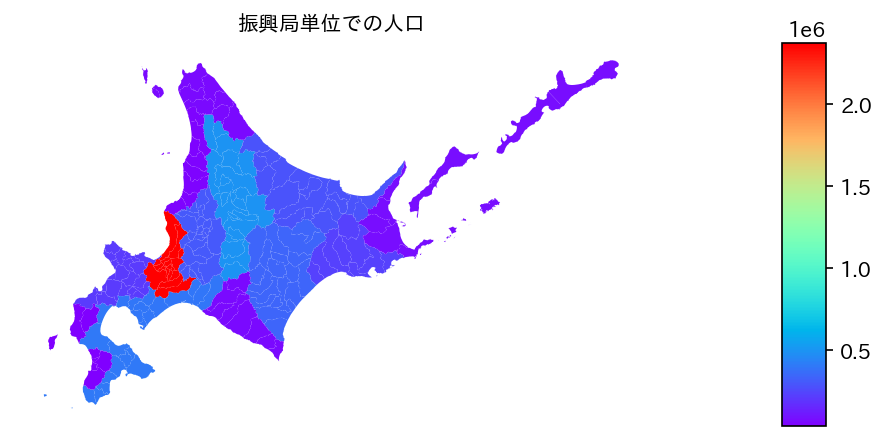

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(8,6),dpi=150)
ax = fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1 )
ax = geo_merged.plot(column="H27_population_total",ax=ax, cmap="rainbow", cax=cax,
                    legend=True, )  # scheme="quantiles"
ax.set_title("振興局単位での人口", fontsize=10)
ax.axis("off")

# Population density with continuous 

(138.855938019, 149.372425341, 41.1413656675, 45.76752330249999)

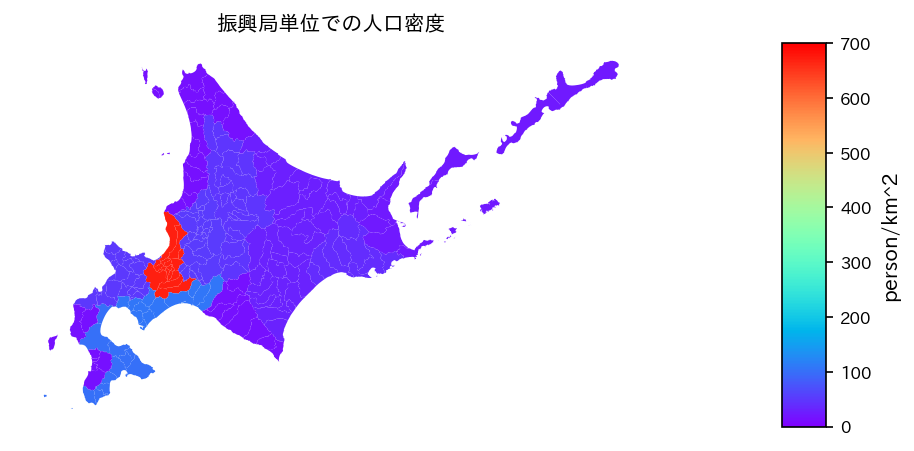

In [9]:
fig = plt.figure(figsize=(8,6),dpi=150)
ax = fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cax.tick_params(labelsize=8)
ax = geo_merged.plot(column="H27_population_density" ,ax=ax, cmap="rainbow", cax=cax,
                    legend=True, legend_kwds={"label":"person/km^2"},vmin=0, vmax=700) 
ax.set_title("振興局単位での人口密度", fontsize=10)
ax.axis("off")

(138.855938019, 149.372425341, 41.1413656675, 45.76752330249999)

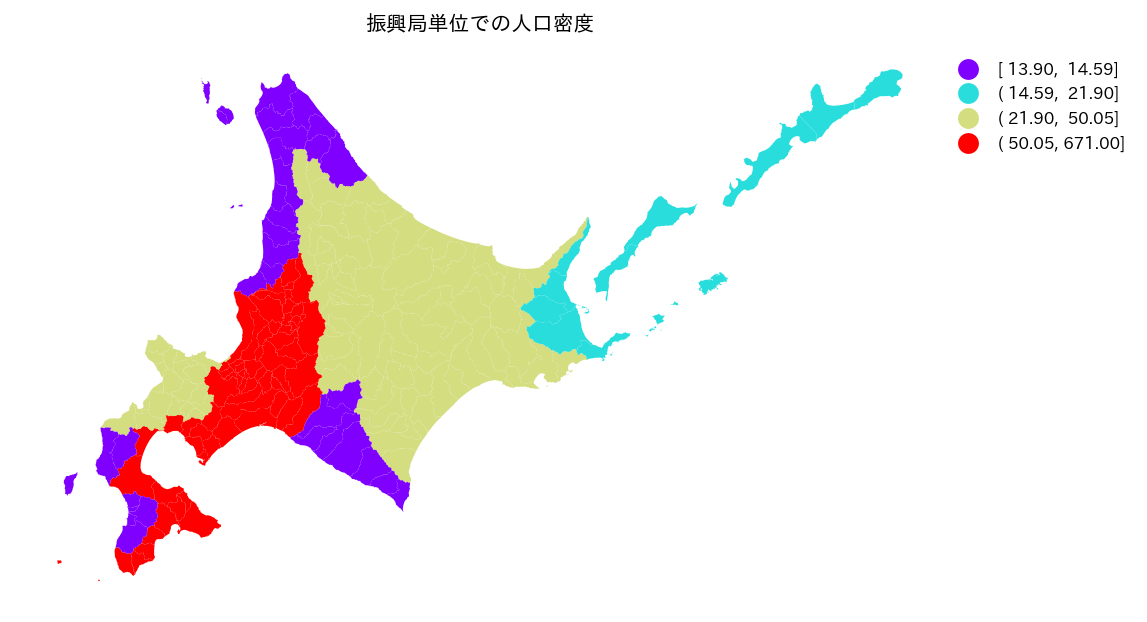

In [10]:
fig = plt.figure(figsize=(8,6),dpi=150)
ax = fig.add_subplot(111)
legend_kwds = dict(bbox_to_anchor=(1, 0.98), loc='upper left', borderaxespad=0, fontsize=8,frameon = False)
ax = geo_merged.plot(column="H27_population_density" ,ax=ax, cmap="rainbow", scheme="quantiles", k=4,
                    legend=True,legend_kwds = legend_kwds) 
ax.set_title("振興局単位での人口密度", fontsize=10)
ax.axis("off")